In [20]:
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

from tensorflow.contrib.learn.python.learn import learn_runner
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6




In [21]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
demand_data = pd.read_csv('./data/DemandaInfo.csv', parse_dates=['time'], index_col='time',date_parser=dateparse)
demand_ts = demand_data['demand']

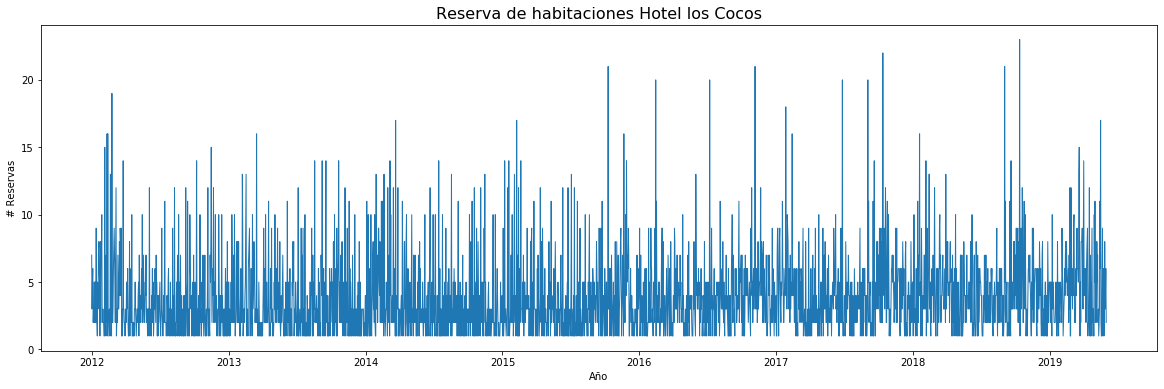

In [22]:
#Plot
plt.plot(demand_ts, linewidth=1)
plt.title(u'Reserva de habitaciones Hotel los Cocos', fontsize=16)
plt.ylabel(u'# Reservas')
plt.xlabel(u'Año')
plt.show()

In [50]:
train = demand_ts[:'2018']
test = demand_ts['2019':]

In [75]:
train.shape

(2555, 1)

In [84]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

training_scaled = scaler.fit_transform(train) 

In [85]:
features_set = []  
labels = []  
for i in range(60, 2555):  
    features_set.append(training_scaled[i-60:i, 0])
    labels.append(training_scaled[i, 0])

In [86]:
#Necesitamos convertir tanto la lista feature_set como la labelslista a la matriz numpy antes de poder usarla para entrenamiento. 
#Ejecuta el siguiente script:

In [87]:
features_set, labels = np.array(features_set), np.array(labels)  

In [88]:
# La primera dimensión es el número de registros o filas en el conjunto de datos que es 2555 
# La segunda dimensión es el número de pasos de tiempo que es 60
# La última dimensión es el número de indicadores

In [89]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

In [90]:
# El modelo LSTM que vamos a crear será un modelo secuencial con múltiples capas. 
# Agregaremos cuatro capas LSTM a nuestro modelo, seguidas de una capa densa que predice el precio futuro de las acciones.


In [93]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [94]:
model = Sequential()  

In [95]:
# Creación de capas LSTM y de deserción

In [96]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  

In [97]:
model.add(Dropout(0.2))  

In [98]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [99]:
# Creando Capa Densa
# modelo sea más robusto, agregamos una capa densa al final del modelo
# El número de neuronas en la capa densa se establecerá en 1, ya que queremos predecir un solo valor en la salida.

In [100]:
model.add(Dense(units = 1))  

In [101]:
# Compilación de modelos

In [102]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

In [103]:
#Entrenamiento de algoritmos

In [104]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  

Epoch 1/100
2495/2495 [==============================] - 19s 8ms/step - loss: 0.0193
Epoch 2/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0186
Epoch 3/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0186
Epoch 4/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0184
Epoch 5/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0185
Epoch 6/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0184
Epoch 7/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0186
Epoch 8/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0183
Epoch 9/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0185
Epoch 10/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0183
Epoch 11/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0185
Epoch 12/100
2495/2495 [==============================] - 15s 6

2495/2495 [==============================] - 15s 6ms/step - loss: 0.0180
Epoch 97/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0180
Epoch 98/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0180
Epoch 99/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0180
Epoch 100/100
2495/2495 [==============================] - 15s 6ms/step - loss: 0.0180


In [106]:
testing_processed = test

In [107]:
#Convertir datos de prueba a formato correcto

In [116]:
total = demand_data['demand']

In [118]:
test_inputs = total[len(total) - len(test) - 60:].values  

In [119]:
test_inputs = test_inputs.reshape(-1,1)  
test_inputs = scaler.transform(test_inputs)  

In [120]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])

In [121]:
test_features = np.array(test_features)  
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [122]:
predictions = model.predict(test_features)  

In [123]:
predictions = scaler.inverse_transform(predictions) 

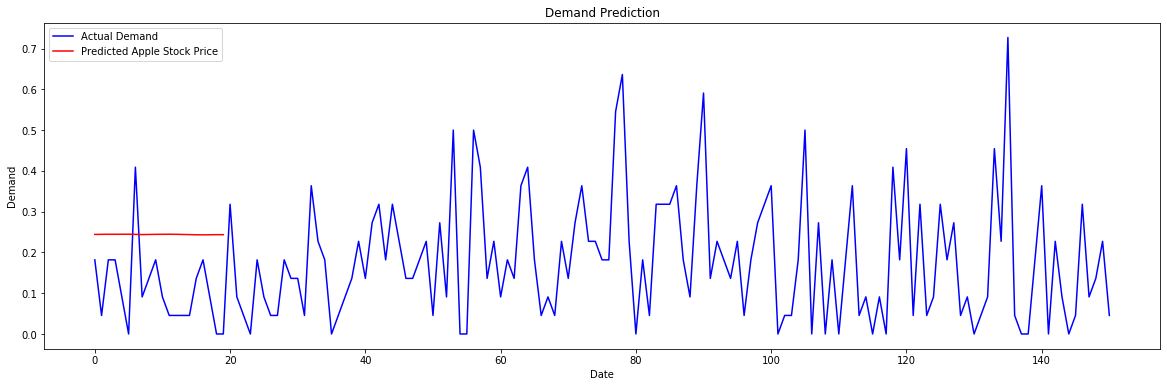

In [127]:
plt.figure(figsize=(20,6))  
plt.plot(testing_processed, color='blue', label='Actual Demand')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Demand Prediction')  
plt.xlabel('Date')  
plt.ylabel('Demand')  
plt.legend()  
plt.show() 